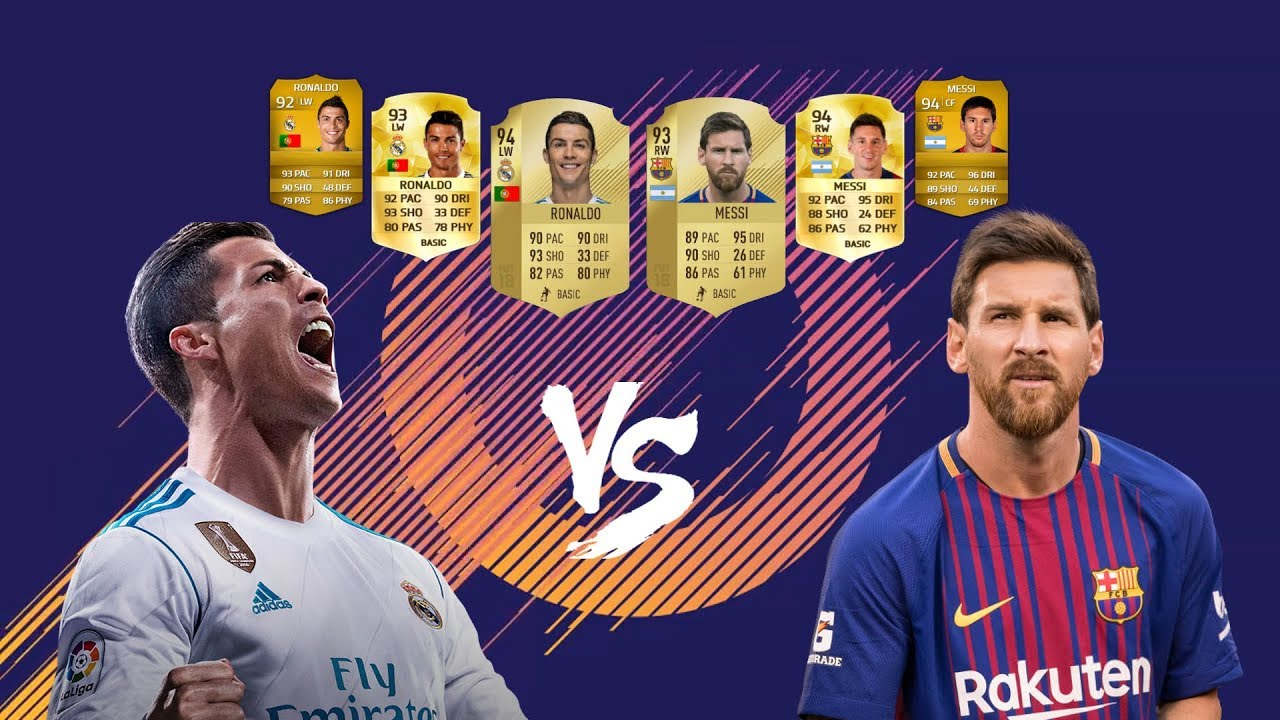

EA Sports employs a team of 25 EA Producers and 400 outside data contributors, who are led by Head of Data Collection & Licensing Michael Mueller-Moehring. This team is responsible for ensuring all player data is up to date, while a community of over 6,000 FIFA Data Reviewers or Talent Scouts from all over the world are constantly providing suggestions and alterations to the database.

It is a complicated process but its vast scope ensures that the information in the game itself is as accurate as possible, down to the weak-foot strength of lower league players and teenage reserves from minor leagues.

How are the card ratings calculated in FIFA Ultimate Team?
Each player in FIFA Ultimate Team has an overall rating as well as six scores for the key stats; Pace, Shooting, Passing, Dribbling, Defending, and Physical. These stats are combined with a player's international recognition to calculate the player's overall rating. This ensures that players who are both fast and strong but play in weaker leagues do not find their overall score skewed compared to slower, weaker but ultimately more talented players at a higher level.

"If Messi were playing in the Irish league, his attributes would drop simply because he's not on the highest level anymore," Mueller-Moehring told ESPN. "We want to base our ratings on actual performance data. When it comes to physical attributes, though, no such guidelines exist. There are fast and strong players in every professional league in the world." 

Therefore, these players will still be strong and fast in the game, but will have an overall score relative to their current playing level. Harry Kane's FIFA 13 card was 67 overall while he was on loan at Leicester, but he is one of the top 100 players in FIFA with an 89 rating.

The overall card rating of each player is also determined based on their in-game position. Therefore, a centre-back with good finishing does not get an advantage over a more defensive-minded player who is better in that position. Certain statistics are also given "Positional Coefficients" which are multiplied and added to assign an overall score.

Using Virgil van Dijk's FIFA in-game scores, we can use the Positional Coefficients for centre-backs to see exactly how his overall rating of 90 was calculated:

### Import required libraries

In [1]:
# Starting with the standard imports
import numpy as np
import pandas as pd
import pandas_profiling


# Preprocessing data
from sklearn.model_selection import train_test_split     # data-splitter
from sklearn.preprocessing import StandardScaler         # data-no  rmalization
from sklearn.preprocessing import PolynomialFeatures     # for polynomials
from sklearn.pipeline import make_pipeline               # for pipelines
np.random.seed (42)                                      # for reproducible results

#
# Modeling and Metrics
# 
# --For Classifier
from sklearn.linear_model import LogisticRegression, LinearRegression     # Classifier
from sklearn.metrics import confusion_matrix             # confusion matrix
from sklearn.metrics import classification_report        # goodness of fit report
from sklearn.metrics import roc_curve                    # draw the ROC-curve
from sklearn.metrics import roc_auc_score                # area under ROC
from sklearn.metrics import accuracy_score
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor #gradiant bootsing classifier
from sklearn.model_selection import train_test_split     #split data into training and test


# Now the Graphical libraries imports and settings
%matplotlib inline
import matplotlib.pyplot as plt                          # for plotting
import seaborn as sns                                    # nicer looking plots
from matplotlib import colors                            # for web-color specs
plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
plt.rcParams[ 'legend.fontsize' ] = 16                   # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16                    # axis label font size
plt.style.use ('ggplot')                                 # emulate ggplot style
import folium

# For latex-quality legends
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=False) # Enable it selectively -- pandas_profiling breaks
rc ('font', size=20)

import warnings
warnings.filterwarnings ('ignore')  # suppress warning

### Read the data

In [2]:
data = pd.read_csv('data/playerdata.csv')

In [3]:
data.shape

(18207, 89)

In [4]:
data.describe(include='all').transpose()

count unique   ...        75%     max
Unnamed: 0                18207    NaN   ...    13654.5   18206
ID                        18207    NaN   ...     236530  246620
Name                      18207  17194   ...        NaN     NaN
Age                       18207    NaN   ...         28      45
Photo                     18207  18207   ...        NaN     NaN
Nationality               18207    164   ...        NaN     NaN
Flag                      18207    164   ...        NaN     NaN
Overall                   18207    NaN   ...         71      94
Potential                 18207    NaN   ...         75      95
Club                      17966    651   ...        NaN     NaN
Club Logo                 18207    679   ...        NaN     NaN
Value                     18207    217   ...        NaN     NaN
Wage                      18207    144   ...        NaN     NaN
Special                   18207    NaN   ...       1787    2346
Preferred Foot            18159      2   ...        NaN     NaN
International Reputation  18159    NaN   ...          1       5
Weak Foot                 18159    NaN   ...          3       5
Skill Moves               18159    NaN   ...          3       5
Work Rate                 18159      9   ...        NaN     NaN
Body Type                 18159     10   ...        NaN     NaN
Real Face                 18159      2   ...        NaN     NaN
Position                  18147     27   ...        NaN     NaN
Jersey Number             18147    NaN   ...         26      99
Joined                    16654   1736   ...        NaN     NaN
Loaned From                1264    341   ...        NaN     NaN
Contract Valid Until      17918     36   ...        NaN     NaN
Height                    18159     21   ...        NaN     NaN
Weight                    18159     57   ...        NaN     NaN
LS                        16122     93   ...        NaN     NaN
ST                        16122     93   ...        NaN     NaN
...                         ...    ...   ...        ...     ...
Dribbling                 18159    NaN   ...         68      97
Curve                     18159    NaN   ...         62      94
FKAccuracy                18159    NaN   ...         57      94
LongPassing               18159    NaN   ...         64      93
BallControl               18159    NaN   ...         69      96
Acceleration              18159    NaN   ...         75      97
SprintSpeed               18159    NaN   ...         75      96
Agility                   18159    NaN   ...         74      96
Reactions                 18159    NaN   ...         68      96
Balance                   18159    NaN   ...         74      96
ShotPower                 18159    NaN   ...         68      95
Jumping                   18159    NaN   ...         73      95
Stamina                   18159    NaN   ...         74      96
Strength                  18159    NaN   ...         74      97
LongShots                 18159    NaN   ...         62      94
Aggression                18159    NaN   ...         69      95
Interceptions             18159    NaN   ...         64      92
Positioning               18159    NaN   ...         64      95
Vision                    18159    NaN   ...         64      94
Penalties                 18159    NaN   ...         60      92
Composure                 18159    NaN   ...         67      96
Marking                   18159    NaN   ...         64      94
StandingTackle            18159    NaN   ...         66      93
SlidingTackle             18159    NaN   ...         64      91
GKDiving                  18159    NaN   ...         14      90
GKHandling                18159    NaN   ...         14      92
GKKicking                 18159    NaN   ...         14      91
GKPositioning             18159    NaN   ...         14      90
GKReflexes                18159    NaN   ...         14      94
Release Clause            16643   1244   ...        NaN     NaN

[89 rows x 11 columns]

In [5]:
data.head()

Unnamed: 0      ID       ...       GKReflexes  Release Clause
0           0  158023       ...              8.0         €226.5M
1           1   20801       ...             11.0         €127.1M
2           2  190871       ...             11.0         €228.1M
3           3  193080       ...             94.0         €138.6M
4           4  192985       ...             13.0         €196.4M

[5 rows x 89 columns]

### Pandas Profilling

In [6]:
report = pandas_profiling.ProfileReport(data)
report

### Dealing with unnecessary features and missing values

In [7]:
#Dropping columns which are of very less significance.
data.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Release Clause',
                   'Joined', 'Contract Valid Until'], inplace=True)

In [8]:
#Check for missing values in columns where missing values is more than half of the total number of values.
data.isnull().sum()[data.isnull().sum() >= 9000]

Loaned From    16943
dtype: int64

In [9]:
#Dropping column based on above condition
data.drop(columns=['Loaned From'], inplace=True)

In [10]:
data.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
          

Still a lot of missing values to deal with. Let us fill in these missing values appropriately and/or drop columns which are not required. <br><br>

In [11]:
#Players who are not part of any club.
data['Club'].fillna(value='Free Agent"', inplace=True)

In [12]:
data[data['Preferred Foot'].isna()].head()

Name  Age     ...     GKPositioning  GKReflexes
13236   J. McNulty   33     ...               NaN         NaN
13237   J. Barrera   29     ...               NaN         NaN
13238     J. Stead   35     ...               NaN         NaN
13239  A. Semprini   20     ...               NaN         NaN
13240   R. Bingham   24     ...               NaN         NaN

[5 rows x 78 columns]

In [13]:
#Full of NaN values for many features, so drop.
data.drop(index=data[data['Preferred Foot'].isna()].index, inplace=True)

In [14]:
data[data['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

Name Nationality   LS   ST   RS ...    LB  LCB   CB  RCB   RB
5018      R. Raldes     Bolivia  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN
6736        J. Arce     Bolivia  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN
7922   L. Gutiérrez     Bolivia  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN
9905      R. Vargas     Bolivia  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN
10628   D. Bejarano     Bolivia  NaN  NaN  NaN ...   NaN  NaN  NaN  NaN  NaN

[5 rows x 28 columns]

In [15]:
#Can fill in position manually but LS, RS, CF, etc. features have no values, so drop them.
data.drop(index=data[data['Position'].isna()].index, inplace=True)

In [16]:
#Checking the number of missing values in the remaining columns.
data.isnull().sum()[data.isnull().sum() > 0]

LS     2025
ST     2025
RS     2025
LW     2025
LF     2025
CF     2025
RF     2025
RW     2025
LAM    2025
CAM    2025
RAM    2025
LM     2025
LCM    2025
CM     2025
RCM    2025
RM     2025
LWB    2025
LDM    2025
CDM    2025
RDM    2025
RWB    2025
LB     2025
LCB    2025
CB     2025
RCB    2025
RB     2025
dtype: int64

In [17]:
len(data[data['Position'] == 'GK'])

2025

Looks like the above features are not set for Goalkeepers. We cannot drop them as it would remove all the goal keepers from our dataset. Instead we will fill these values with 0.

In [18]:
data.fillna(value=0, inplace=True)

In [19]:
data.isnull().sum().sum()

0

Our dataset does not contain any missing values.

### Converting categorical features to appropriate numerical features

In [20]:
data.select_dtypes(include=object).columns

Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [21]:
#Function to convert value and wage of the player.
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [22]:
data['Value in Pounds'] = data['Value'].apply(currencyConverter)
data['Wage in Pounds'] = data['Wage'].apply(currencyConverter)

data.drop(columns=['Value', 'Wage'], inplace=True)

data.head()

Name  Age       ...       Value in Pounds  Wage in Pounds
0           L. Messi   31       ...           110500000.0        565000.0
1  Cristiano Ronaldo   33       ...            77000000.0        405000.0
2          Neymar Jr   26       ...           118500000.0        290000.0
3             De Gea   27       ...            72000000.0        260000.0
4       K. De Bruyne   27       ...           102000000.0        355000.0

[5 rows x 78 columns]

Value and Wage have been converted.
<br><br><br>

In [23]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

LS    ST    RS    LW    LF    CF  ...    RWB    LB   LCB    CB   RCB    RB
0  88+2  88+2  88+2  92+2  93+2  93+2  ...   64+2  59+2  47+2  47+2  47+2  59+2
1  91+3  91+3  91+3  89+3  90+3  90+3  ...   65+3  61+3  53+3  53+3  53+3  61+3
2  84+3  84+3  84+3  89+3  89+3  89+3  ...   65+3  60+3  47+3  47+3  47+3  60+3
3     0     0     0     0     0     0  ...      0     0     0     0     0     0
4  82+3  82+3  82+3  87+3  87+3  87+3  ...   77+3  73+3  66+3  66+3  66+3  73+3

[5 rows x 26 columns]

In [24]:
#Function to convert skill rating at each position.
def PlayingPositionsConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [25]:
playing_positions_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in playing_positions_columns:
    data[col] = data[col].apply(PlayingPositionsConverter)

In [26]:
data[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

LS  ST  RS  LW  LF  CF  RF  RW ...  CDM  RDM  RWB  LB  LCB  CB  RCB  RB
0  90  90  90  94  95  95  95  94 ...   63   63   66  61   49  49   49  61
1  94  94  94  92  93  93  93  92 ...   64   64   68  64   56  56   56  64
2  87  87  87  92  92  92  92  92 ...   63   63   68  63   50  50   50  63
3   0   0   0   0   0   0   0   0 ...    0    0    0   0    0   0    0   0
4  85  85  85  90  90  90  90  90 ...   80   80   80  76   69  69   69  76

[5 rows x 26 columns]

Converted to numeric.
<br><br>

In [27]:
data[['Height', 'Weight']].head()

Height  Weight
0    5'7  159lbs
1    6'2  183lbs
2    5'9  150lbs
3    6'4  168lbs
4   5'11  154lbs

In [28]:
def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [29]:
data['Height in Cms'] = data['Height'].apply(height_converter)
data['Weight in Pounds'] = data['Weight'].apply(weight_converter)

data.drop(columns=['Height', 'Weight'], inplace=True)
data[['Height in Cms', 'Weight in Pounds']].head()

Height in Cms  Weight in Pounds
0         170.18               159
1         187.96               183
2         175.26               150
3         193.04               168
4         180.34               154

<br><br><br>
For the remaining columns - **Work Rate, Body Type, Position**, we will not be converting them to numerical features right now. Here, we ensure these features have appropriate values and they will be converted to numerical features when feeding this data to our machine learning models.

In [30]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [31]:
data['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [32]:
data['Body Type'][data['Body Type'] == 'Messi'] = 'Lean'
data['Body Type'][data['Body Type'] == 'C. Ronaldo'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Neymar'] = 'Lean'
data['Body Type'][data['Body Type'] == 'Courtois'] = 'Lean'
data['Body Type'][data['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
data['Body Type'][data['Body Type'] == 'Shaqiri'] = 'Stocky'
data['Body Type'][data['Body Type'] == 'Akinfenwa'] = 'Stocky'

In [33]:
print(data['Position'].unique())
print(data['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']
27


Let us simplify the above positions into 4 simple categories of - **F**orwards, **M**idfielders, **D**efenders and **G**oal**K**eepers

In [34]:
def position_reducer(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val
        

In [35]:
data['Position'] = data['Position'].apply(position_reducer)
data['Position'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: Position, dtype: int64

<br><br><br>

# Visualizations


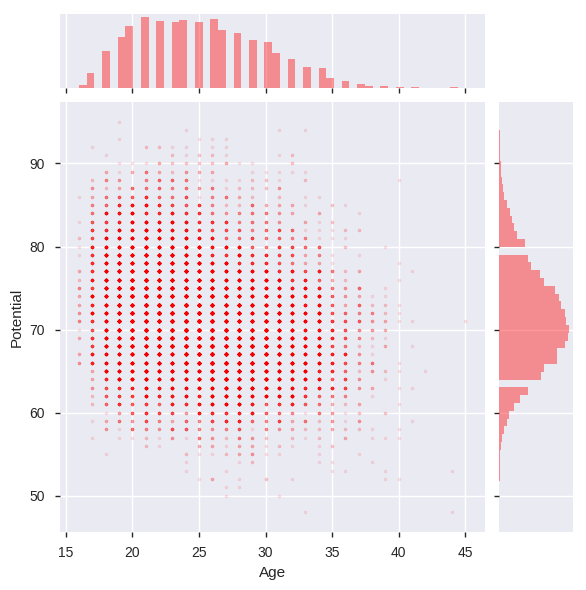

In [36]:
sns.jointplot(x=data['Age'],y=data['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

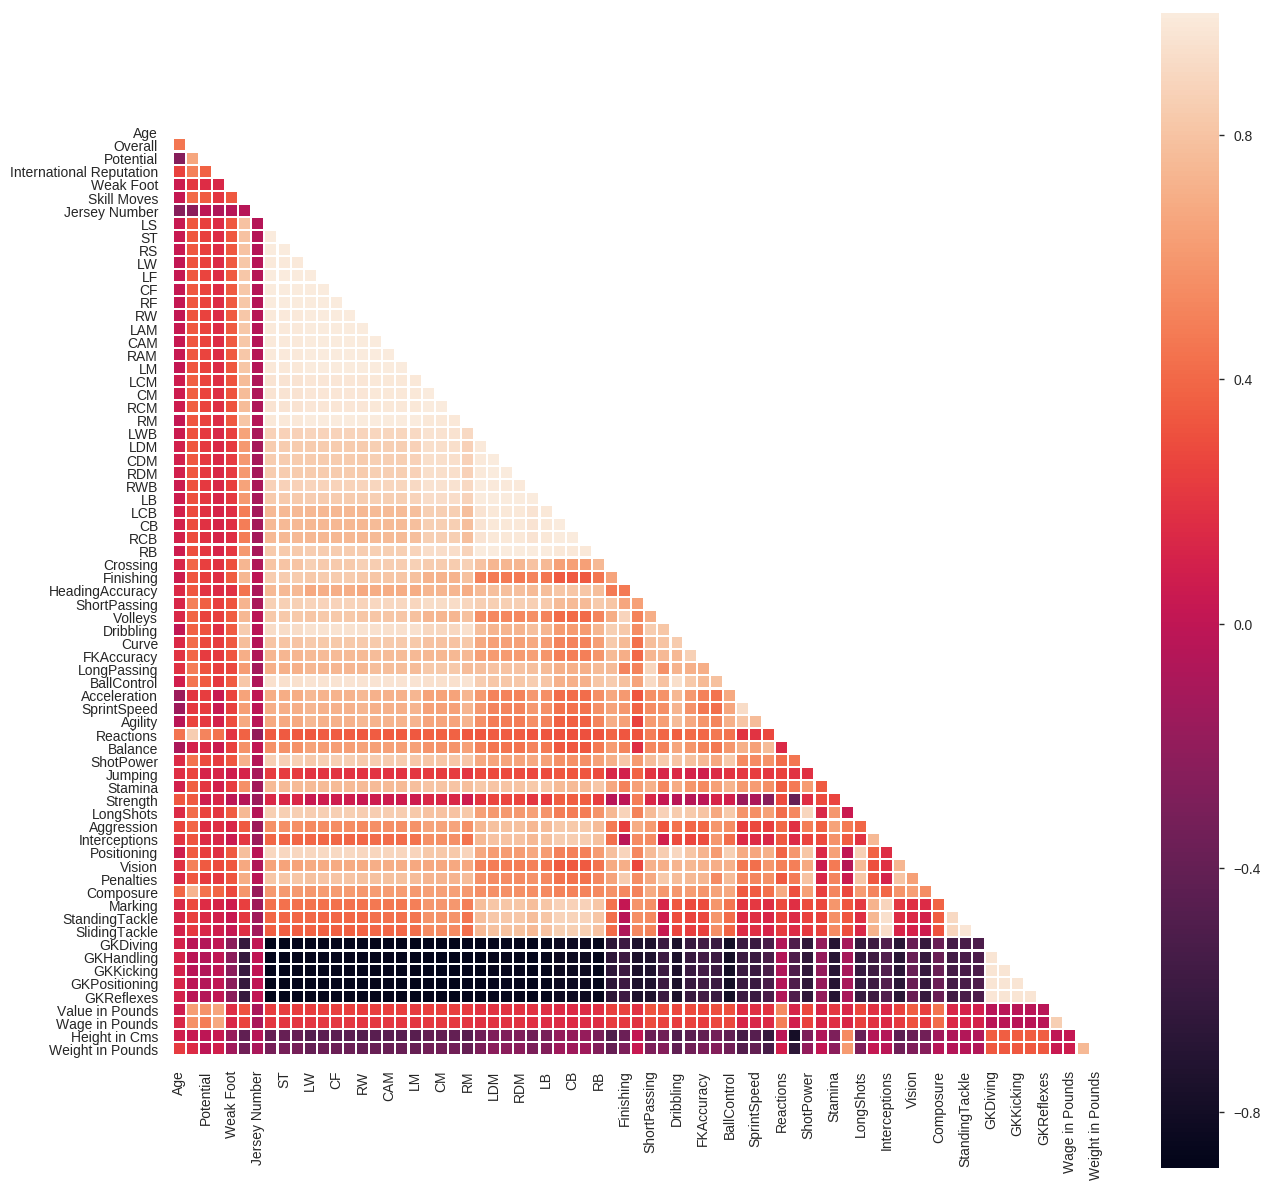

In [37]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8)

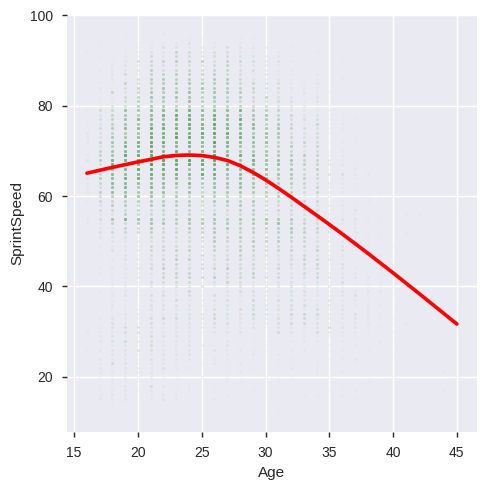

In [38]:
sns.lmplot(data = data, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

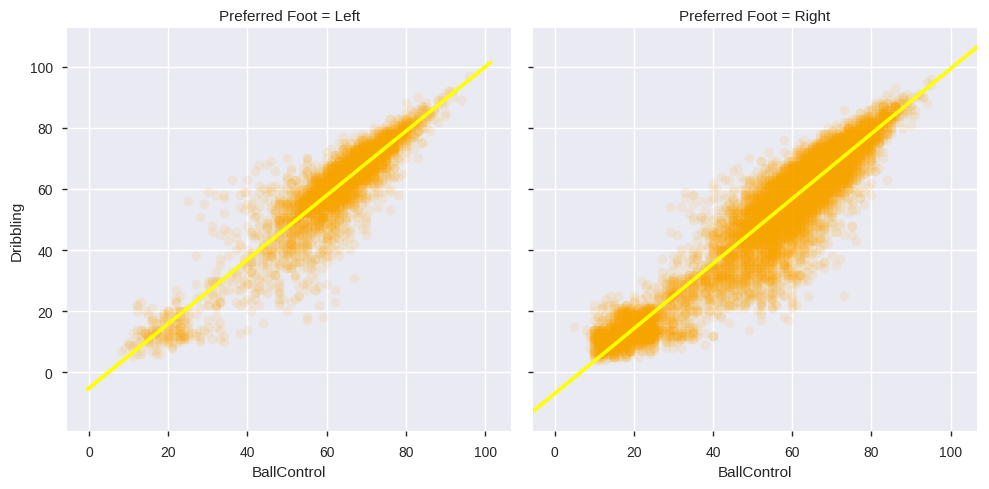

In [39]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'yellow'})

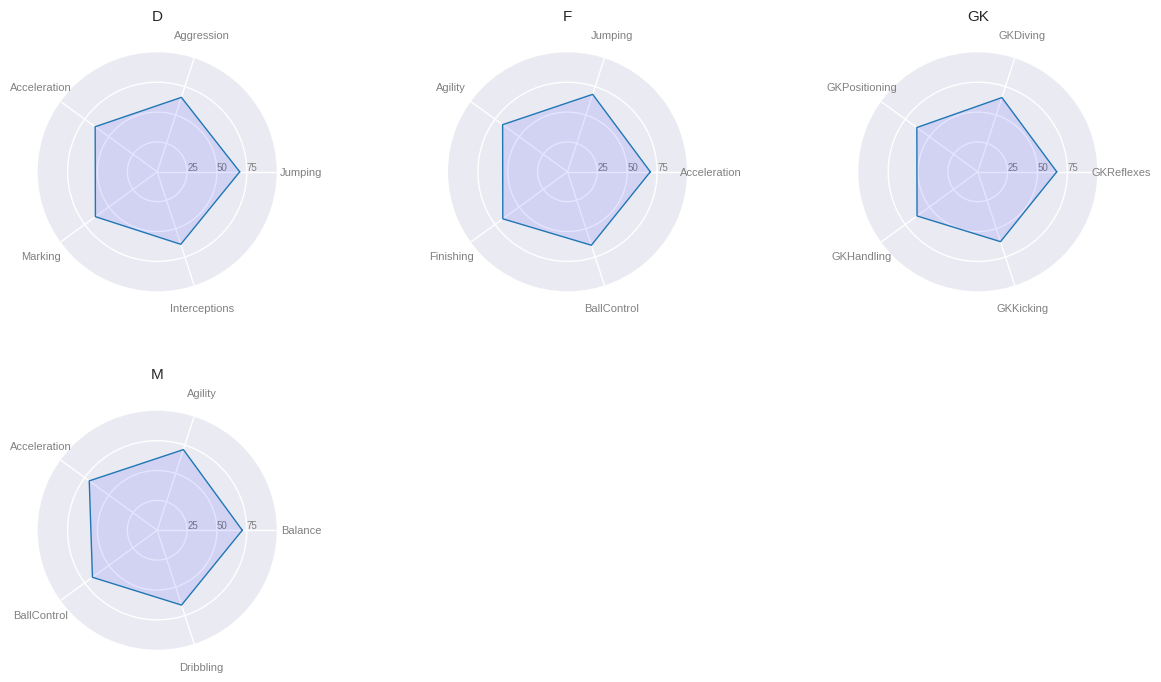

In [40]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

from math import pi
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

# We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

In [41]:
data.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Value in Pounds', 'Wage in Pounds', 'Height in Cms',
       'Weight in Pounds'],
      d

Text(0.5, 1.0, 'Age Count')

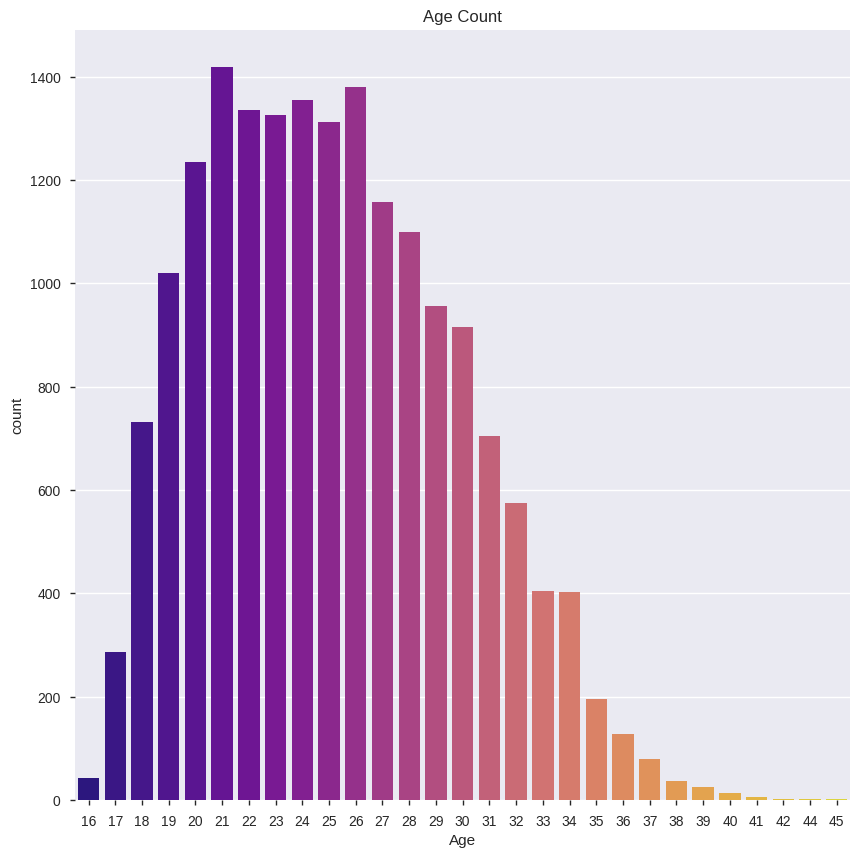

In [42]:
sns.countplot(data['Age'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Age Count')

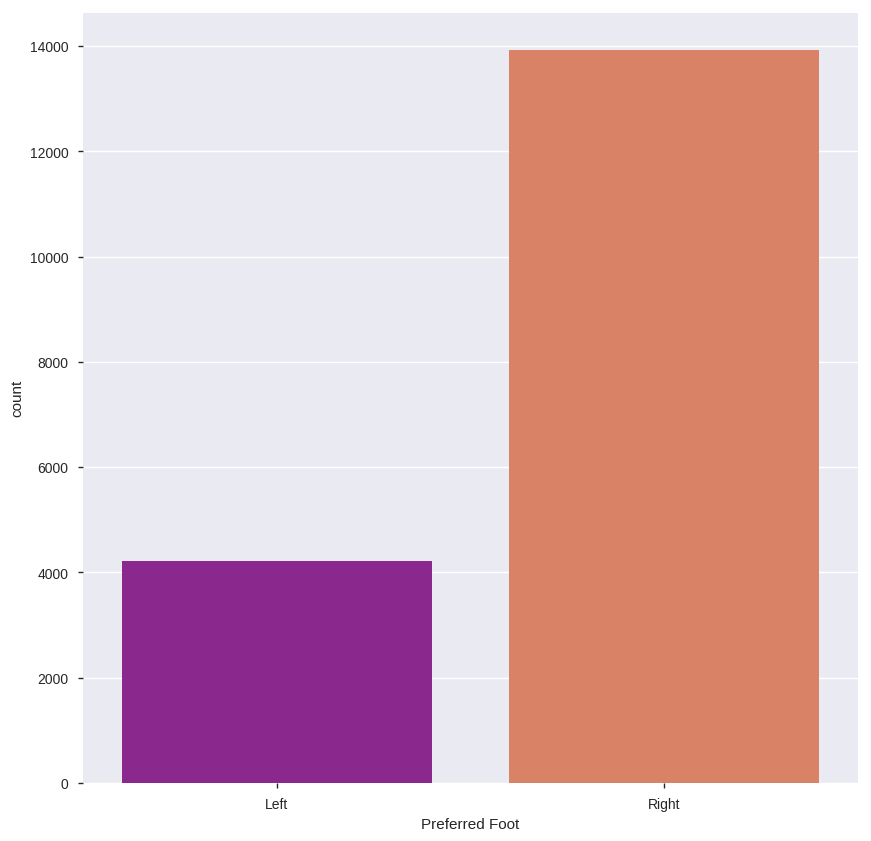

In [43]:
sns.countplot(data['Preferred Foot'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)


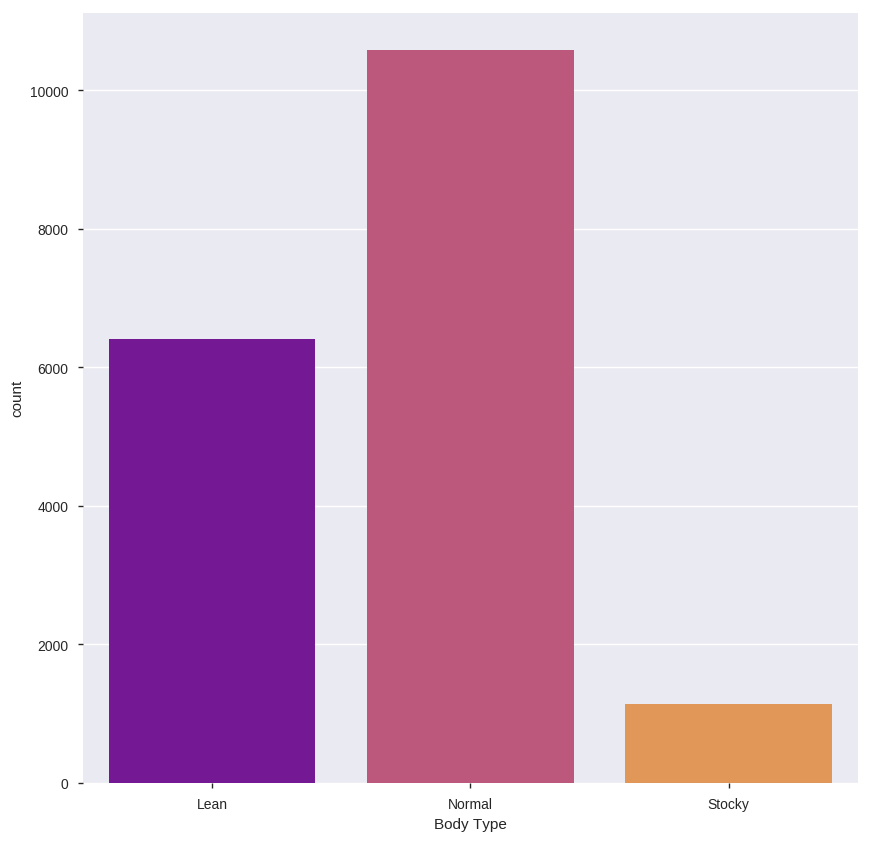

In [44]:
sns.countplot(data['Body Type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)

# Classification based on Position

In [45]:
#Transforming categorical feature into numeric.
#Goal Keeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'D':
        return 1
    elif val == 'M':
        return 2
    else:
        return 3
    
data['Position'] = data['Position'].apply(pos_numeric)

In [46]:
df_pos = data.copy()

#Dropping unnecessary columns
df_pos.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [47]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [48]:
#Splitting dataset into train and test sets.
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X,y, random_state=42, )

### Logisitic Regression model

In [49]:
clf = LogisticRegression(solver='newton-cg')

In [50]:
clf.fit(X_clf_train, y_clf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
prediction = clf.predict(X_clf_test)

In [52]:
print(classification_report(y_clf_test, prediction))
print('\n')
print(confusion_matrix(y_clf_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_clf_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       0.92      0.93      0.92      1433
           2       0.89      0.90      0.89      1933
           3       0.86      0.83      0.85       661

   micro avg       0.91      0.91      0.91      4537
   macro avg       0.92      0.91      0.92      4537
weighted avg       0.91      0.91      0.91      4537



[[ 510    0    0    0]
 [   0 1326  106    1]
 [   0  112 1731   90]
 [   0    1  109  551]]


Accuracy Score:  0.9076482256998016


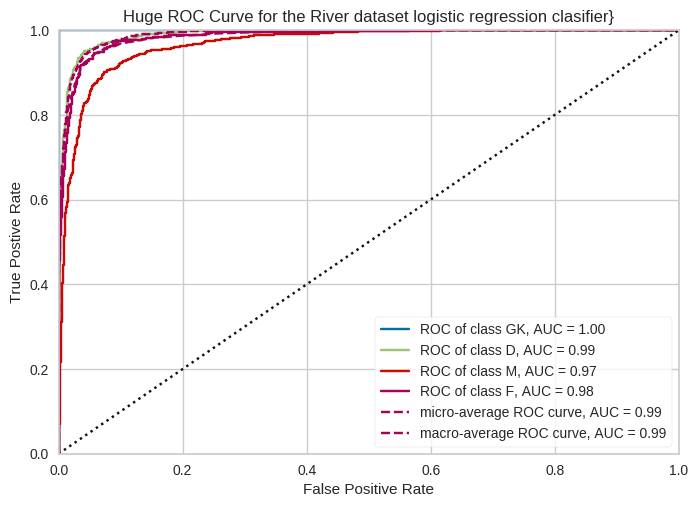

In [53]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge ROC Curve for the River dataset logistic regression clasifier}',);

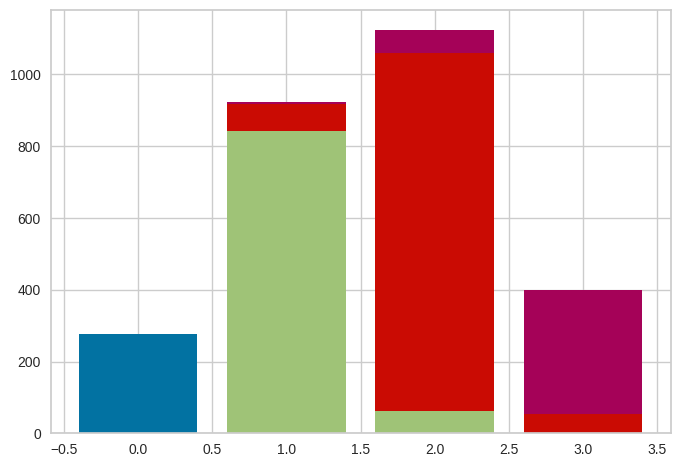

In [54]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge Class prediction error for the logistic classifier',);

Just by dropping a few columns and without any fine tuning, the Logisitic Regression model gets a pretty good accuracy score.<br><br>
Notice the 100% accuracy while classifying Goal Keepers. This is expected as the features such as LS, RS, CF, etc. is equal to 0 for all the goal keepers in our dataset.<br><br>
Let us try to increase the accuracy in classifying other positions.
<br><br><br><br>

**Correlation between Position and other features**

In [55]:
df_pos.corr().abs()['Position'].sort_values(ascending=False)

Position                    1.000000
Finishing                   0.824777
LS                          0.764850
ST                          0.764850
RS                          0.764850
Positioning                 0.760926
RF                          0.750532
CF                          0.750532
LF                          0.750532
Penalties                   0.743087
Volleys                     0.742479
RW                          0.729755
LW                          0.729755
CAM                         0.727863
RAM                         0.727863
LAM                         0.727863
LongShots                   0.716903
LM                          0.701364
RM                          0.701364
Dribbling                   0.696398
ShotPower                   0.687332
BallControl                 0.669807
GKDiving                    0.637548
LCM                         0.637297
CM                          0.637297
RCM                         0.637297
GKReflexes                  0.636032
G

Notice how similar features such as LS, RS and CAM, LAM, RAM and so on have similar correlation. Let us combine such features into individual single features.

In [56]:
df_pos['Frw'] = (df_pos['RF'] + df_pos['ST'] + df_pos['LF'] + df_pos['RS'] + df_pos['LS'] + df_pos['CF']) / 6

df_pos['Mid'] = (df_pos['LW'] + df_pos['RCM'] + df_pos['LCM'] + df_pos['LDM'] + df_pos['CAM'] + df_pos['CDM'] + \
                df_pos['RM'] + df_pos['LAM'] + df_pos['LM'] + df_pos['RDM'] + df_pos['RW'] + df_pos['CM'] + df_pos['RAM'])\
                /13

df_pos['Def'] = (df_pos['RCB'] + df_pos['CB'] + df_pos['LCB'] + df_pos['LB'] + df_pos['RB'] + df_pos['RWB']\
                 + df_pos['LWB']) / 7

df_pos['Gk'] = (df_pos['GKDiving'] + df_pos['GKHandling'] + df_pos['GKKicking'] + df_pos['GKPositioning']\
               + df_pos['GKReflexes']) / 5

df_pos.drop(columns=['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM', 'CAM', 'CDM',
                     'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
                    ], inplace=True)

In [57]:
print('Correlation with Position: ', df_pos.corr().abs()['Position'].sort_values(ascending=False).index, '\n')
print('Categorical columns in dataset: ', df_pos.select_dtypes(include=object).columns, '\n')
print('Number of features in dataset: ', len(df_pos.columns))

Correlation with Position:  Index(['Position', 'Finishing', 'Positioning', 'Frw', 'Penalties', 'Volleys',
       'LongShots', 'Dribbling', 'ShotPower', 'BallControl', 'Mid', 'Gk',
       'Skill Moves', 'Curve', 'ShortPassing', 'Agility', 'FKAccuracy',
       'Vision', 'Acceleration', 'SprintSpeed', 'HeadingAccuracy', 'Balance',
       'Crossing', 'Stamina', 'Def', 'LongPassing', 'Composure',
       'Height in Cms', 'Weak Foot', 'Weight in Pounds', 'Aggression',
       'SlidingTackle', 'Reactions', 'Interceptions', 'StandingTackle',
       'Potential', 'Age', 'Value in Pounds', 'Jumping', 'Jersey Number',
       'Wage in Pounds', 'Overall', 'Marking', 'International Reputation',
       'Strength'],
      dtype='object') 

Categorical columns in dataset:  Index(['Preferred Foot', 'Work Rate', 'Body Type'], dtype='object') 

Number of features in dataset:  48


By combining certain features, we have brought down the nubmber of features from 75 to 48.<br><br><br>

**Dropping columns with lower correlation**

In [58]:
#df_pos = data.copy()
#Dropping Preferred Foot column too as it does not play a significant role in classifying the position of the player. 
df_pos.drop(columns=['StandingTackle', 'Potential', 'Age', 'Value in Pounds', 
                     'Jumping', 'Jersey Number', 'Wage in Pounds', 'Overall', 'Marking',
                     'International Reputation', 'Strength', 'Preferred Foot'], inplace=True)

In [59]:
clf = LogisticRegression(solver='newton-cg')

In [60]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [61]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X,y, random_state=42, )

**Logistic Regression model after dropping lower correlated features**

In [62]:
clf.fit(X_clf_train, y_clf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
prediction = clf.predict(X_clf_test)

In [64]:
print(classification_report(y_clf_test, prediction))
print('\n')
print(confusion_matrix(y_clf_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_clf_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       510
           1       0.91      0.92      0.92      1433
           2       0.89      0.89      0.89      1933
           3       0.85      0.83      0.84       661

   micro avg       0.90      0.90      0.90      4537
   macro avg       0.91      0.91      0.91      4537
weighted avg       0.90      0.90      0.90      4537



[[ 510    0    0    0]
 [   0 1325  107    1]
 [   0  123 1714   96]
 [   0    2  111  548]]


Accuracy Score:  0.9030196164866652


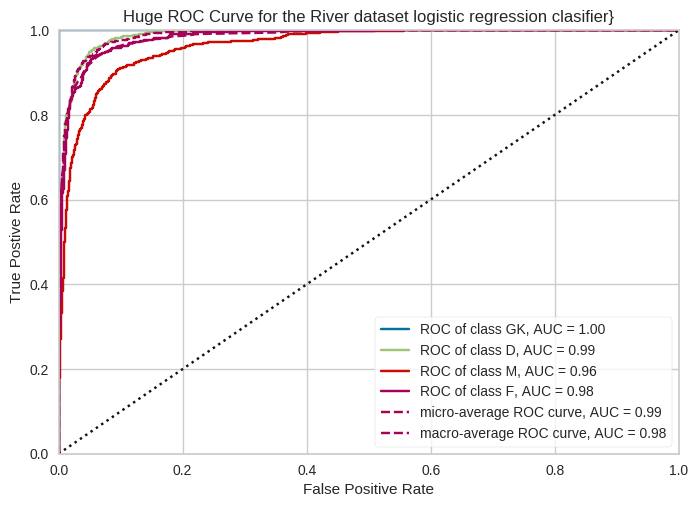

In [65]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge ROC Curve for the River dataset logistic regression clasifier}',);

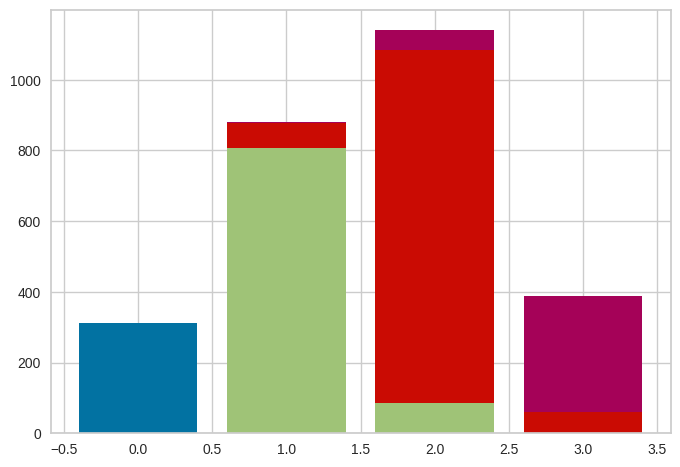

In [66]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'\textsc{\Huge Class prediction error for the logistic classifier}',);

 The new Logisitic Regression model does a better job than the previous model. <br><br>
It is able to better classify Defenders and Midfielders. However, accuracy of classifying Forwards goes down.
<br><br><br><br><br>

**Removing outliers**

In [67]:
sns.set_style(style='darkgrid')
plt.rcParams['figure.figsize'] = 12, 8

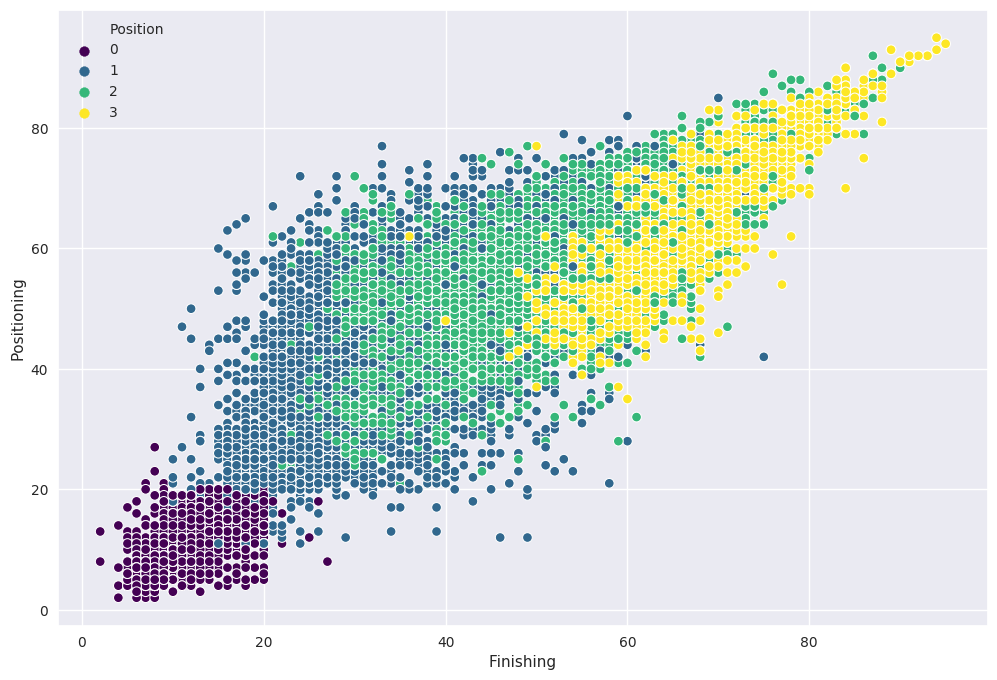

In [68]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

From the above visualization, you can notice several outliers. Let us remove them.

In [69]:
df_pos = df_pos[~((df_pos['Position'] == 1) & (df_pos['Finishing'] > 30) & (df_pos['Positioning'] < 60))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 60) & (df_pos['Positioning'] < 80))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 45))]
df_pos = df_pos[~((df_pos['Position'] == 3) & (df_pos['Finishing'] < 60) & (df_pos['Positioning'] > 70))]
df_pos = df_pos[~((df_pos['Position'] == 2) & (df_pos['Finishing'] > 65) & (df_pos['Positioning'] > 70))]

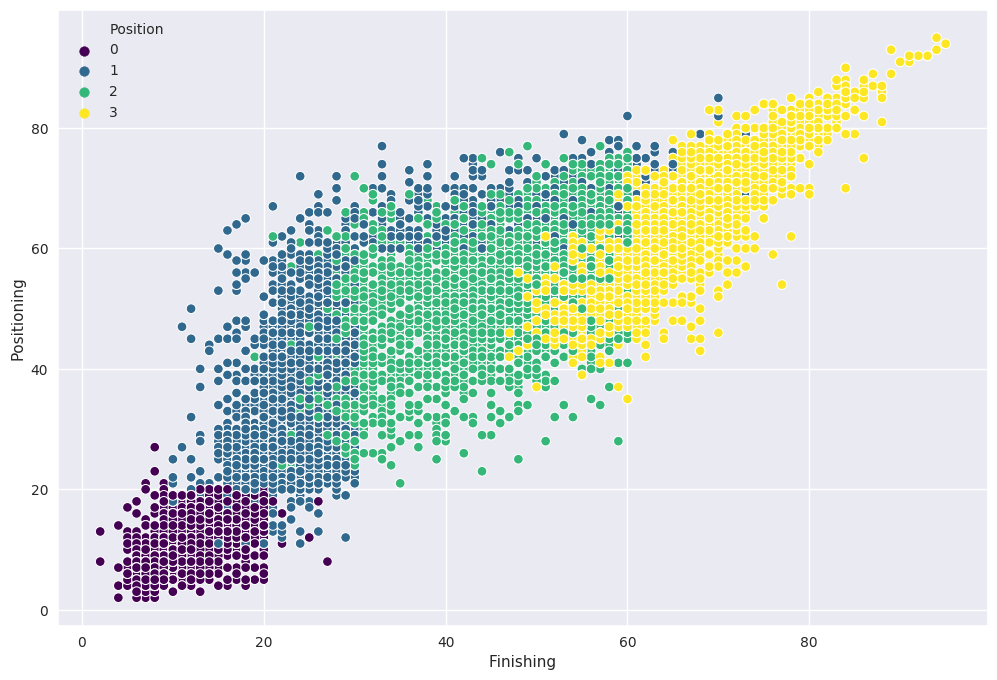

In [70]:
sns.scatterplot(data=df_pos, x='Finishing', y='Positioning', hue='Position', palette='viridis')
plt.show()

There are still several outliers present but if we try and remove them, it might lead to overfitting.<br><br>
Let us now test our model after removing outliers.

 **Logistic Regression Model**

In [71]:
X = df_pos.drop(columns=['Position'])
X = pd.get_dummies(X)
y = df_pos['Position']

In [72]:
clf = LogisticRegression(solver='newton-cg')

In [73]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X,y, random_state=42, )
clf.fit(X_clf_train, y_clf_train)
prediction = clf.predict(X_clf_test)

In [74]:
print(classification_report(y_clf_test, prediction))
print('\n')
print(confusion_matrix(y_clf_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_clf_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       0.91      0.91      0.91       844
           2       0.91      0.91      0.91      1216
           3       0.95      0.95      0.95       676

   micro avg       0.93      0.93      0.93      3234
   macro avg       0.94      0.94      0.94      3234
weighted avg       0.93      0.93      0.93      3234



[[ 498    0    0    0]
 [   0  772   71    1]
 [   0   72 1109   35]
 [   0    0   35  641]]


Accuracy Score:  0.9338280766852195


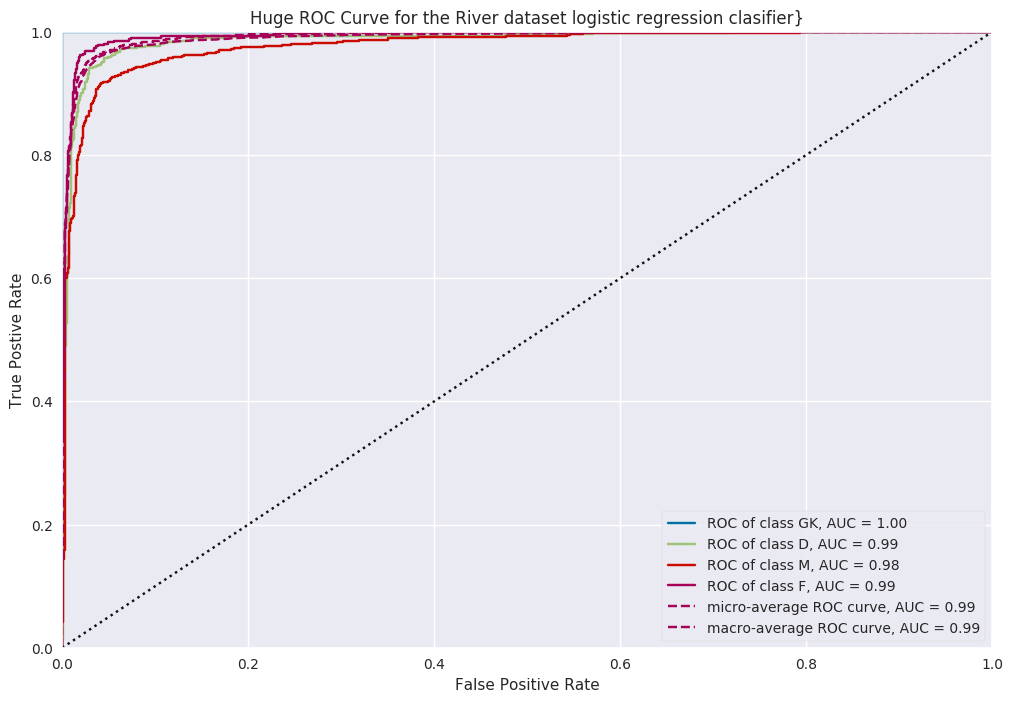

In [75]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge ROC Curve for the River dataset logistic regression clasifier}',);

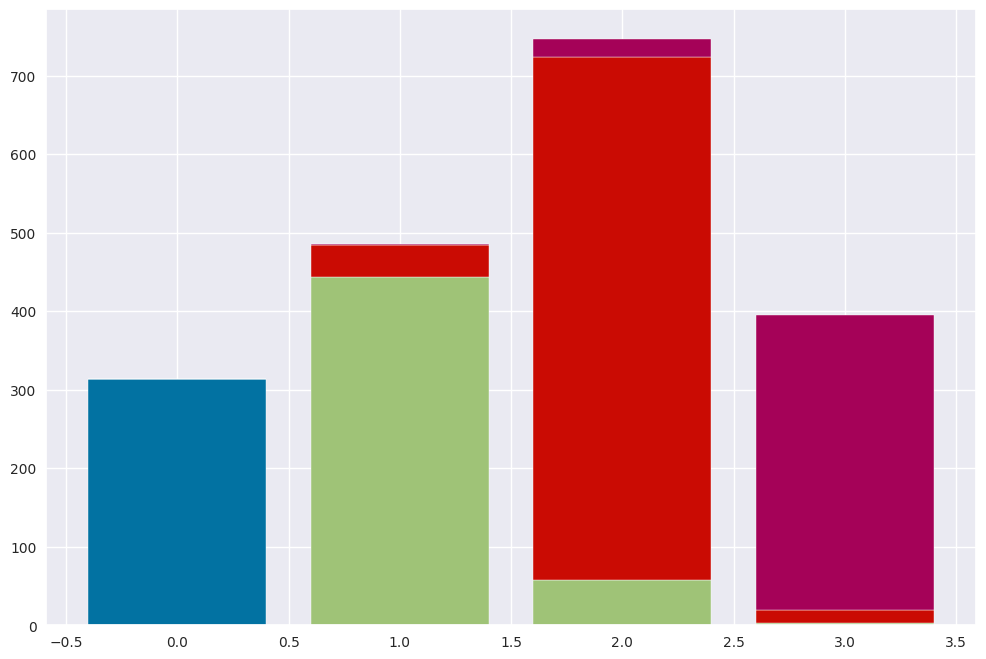

In [76]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'\textsc{\Huge Class prediction error for the logistic classifier}',);

The overall accuracy of the model increases. Our model is now able to better classify Midfielders and Forwards.<br><br>
Let us try a gradiant boosting classificatier model and see how it performs.<br><br><br><br>

### Gradient Boosting Classifier

In [77]:
gbclassifier = GradientBoostingClassifier()

In [78]:
gbclassifier.fit(X_clf_train, y_clf_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [79]:
prediction = gbclassifier.predict(X_clf_test)

In [80]:
print(classification_report(y_clf_test, prediction))
print('\n')
print(confusion_matrix(y_clf_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_clf_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       0.94      0.96      0.95       844
           2       0.96      0.95      0.95      1216
           3       0.98      0.96      0.97       676

   micro avg       0.96      0.96      0.96      3234
   macro avg       0.97      0.97      0.97      3234
weighted avg       0.96      0.96      0.96      3234



[[ 498    0    0    0]
 [   0  814   29    1]
 [   0   51 1151   14]
 [   0    2   23  651]]


Accuracy Score:  0.9628942486085343


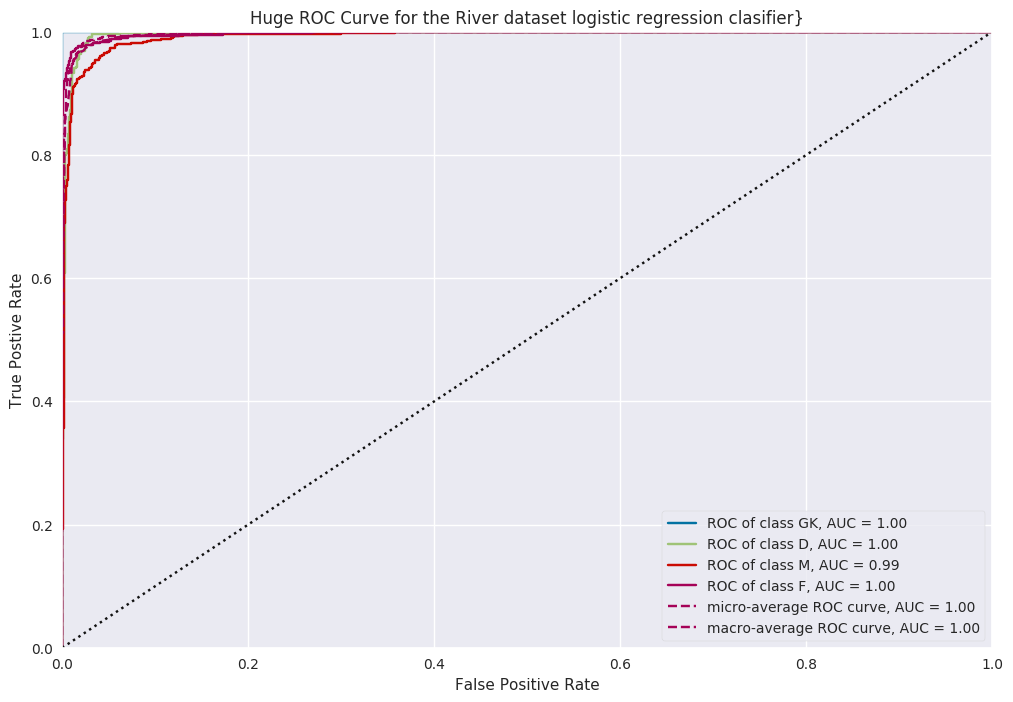

In [81]:
roc_auc(gbclassifier, X_clf_train, y_clf_train, X_testroc_auc=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge ROC Curve for the River dataset logistic regression clasifier}',);

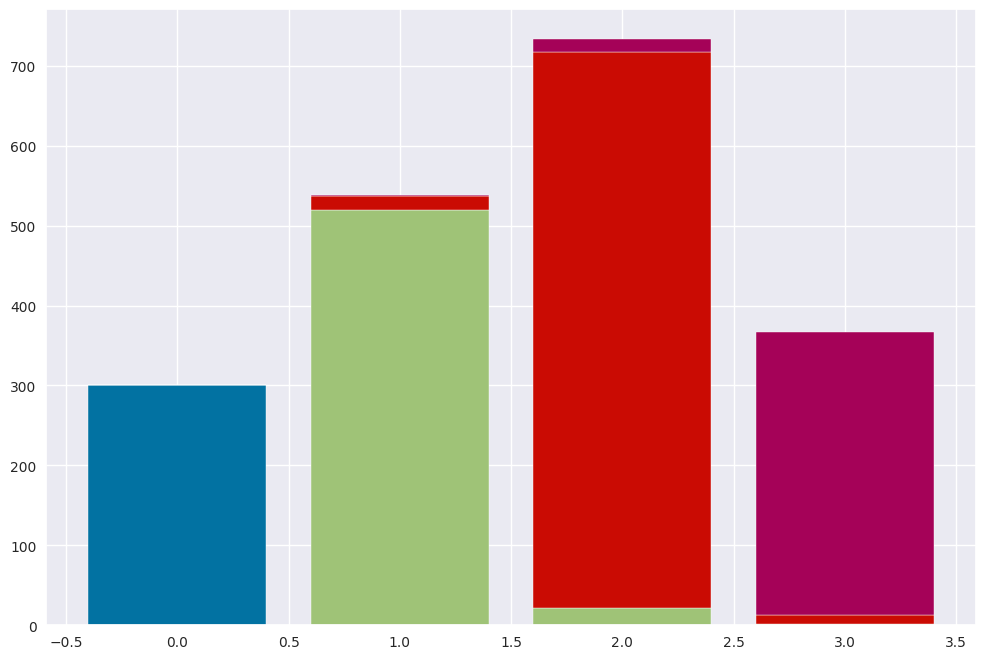

In [82]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(gbclassifier, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['GK', 'D', 'M', 'F'],                       title=r'Huge Class prediction error for the logistic classifier',);

The Gradient Boosting Classifier gets a very high accuracy score.
<br><br><br>


<br>

# Predictions -  *Overall* 

In [83]:
df_ovr = data.copy()
df_ovr.drop(columns=['Name', 'Nationality', 'Club'], inplace=True)

In [84]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Linear Regression Model

In [86]:
linear_model = LinearRegression()

In [87]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
pred = linear_model.predict(X_test)

In [89]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 1.739799023387499
r^2 score:  0.9352966900696231


A r2_score of 0.9364 is good where 1.0 is the best possible r2_score.<br><br>
Let us see if we can better this.<br><br><br>

**Correlation and Outliers**

In [90]:
df_ovr.corr().abs()['Overall'].sort_values(ascending=False)

Overall                     1.000000
Reactions                   0.850071
Composure                   0.727646
Potential                   0.660947
Value in Pounds             0.627025
Wage in Pounds              0.571795
ShortPassing                0.502275
International Reputation    0.499596
Vision                      0.498683
LongPassing                 0.483639
BallControl                 0.460034
Age                         0.453354
ShotPower                   0.441080
LongShots                   0.420791
Curve                       0.419501
Skill Moves                 0.414363
FKAccuracy                  0.397004
Aggression                  0.395142
Crossing                    0.394849
Volleys                     0.391445
Dribbling                   0.372358
Stamina                     0.365652
RCM                         0.365423
LCM                         0.365423
CM                          0.365423
Positioning                 0.356497
Strength                    0.349318
C

In [91]:
#Dropping Height in Cms because of a very low correlation with Overall.
#Not dropping GK because it would be one of the features to predict Overall for goalkeepers.
df_ovr.drop(columns=['Height in Cms'], inplace=True)

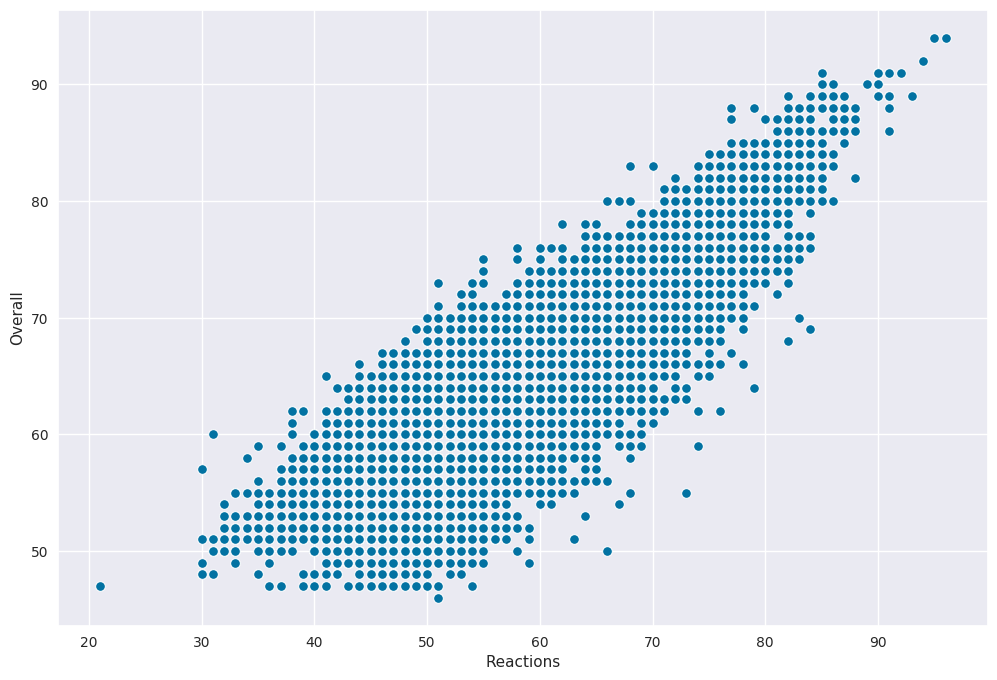

In [92]:
rc ('text', usetex=False) # Enable it selectively -- pandas_profiling breaks
sns.scatterplot(data=df_ovr, x='Reactions', y='Overall')
plt.show()

In [93]:
df_ovr = df_ovr[~((df_ovr['Reactions'] < 25))]
df_ovr = df_ovr[~((df_ovr['Reactions'] < 35) & (df_ovr['Overall'] > 55))]
df_ovr = df_ovr[~((df_ovr['Reactions'] < 35) & (df_ovr['Overall'] > 55))]
df_ovr = df_ovr[~((df_ovr['Reactions'] > 62) & (df_ovr['Overall'] < 55) & (df_ovr['Reactions'] < 70))]

df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 73) & (df_ovr['Overall'] == 55)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 74) & (df_ovr['Overall'] == 59)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 79) & (df_ovr['Overall'] == 64)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 82) & (df_ovr['Overall'] == 68)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 83) & (df_ovr['Overall'] == 70)].index, inplace=True)
df_ovr.drop(df_ovr[(df_ovr['Reactions'] == 84) & (df_ovr['Overall'] == 69)].index, inplace=True)

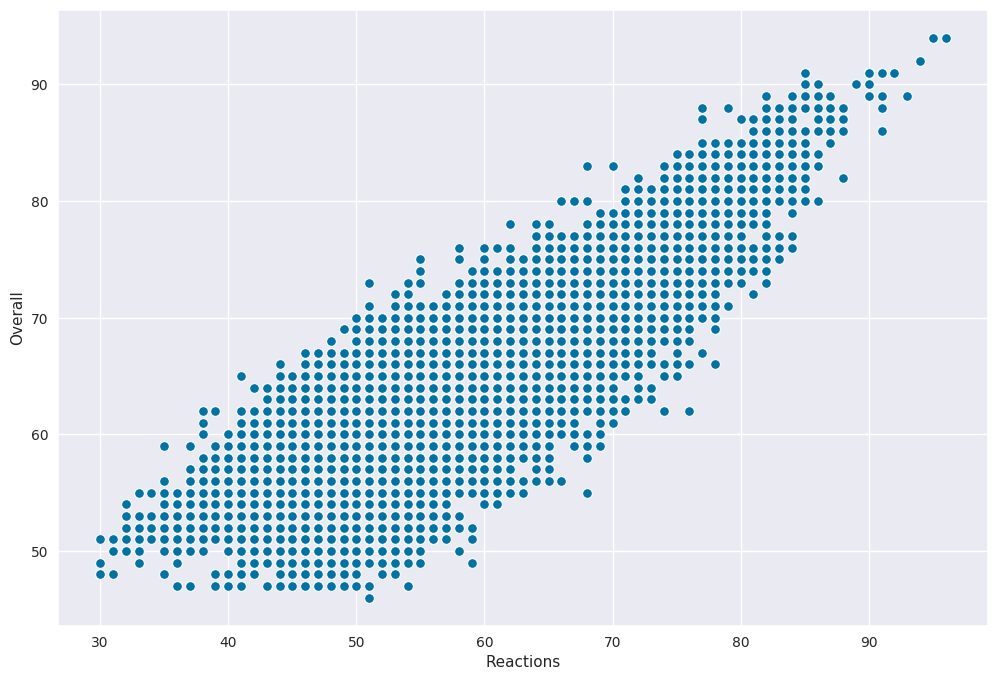

In [94]:
rc ('text', usetex=False) # Enable it selectively -- pandas_profiling breaks
sns.scatterplot(data=df_ovr, x='Reactions', y='Overall')
plt.show()

After removing outliers.<br><br><br>

In [95]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
labels = linear_model.predict(X_test)

# Check how good are the predictions?
mse         = mean_squared_error(y_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")
print(rf'Model coefficients are: {linear_model.coef_}')

Mean squared error: 2.94
Coefficient of Determination (R^2):0.9383
Model coefficients are: [ 4.74613223e-01  4.59259448e-01 -4.03043357e-01  1.24430315e-02
  6.46017477e-01 -8.02900120e-01 -9.13632012e-03  3.64991685e-02
  3.64991679e-02  3.64991679e-02 -1.40562906e-03 -1.99590514e-02
 -1.99590514e-02 -1.99590513e-02 -1.40562906e-03 -1.78885267e-02
 -1.78885267e-02 -1.78885267e-02  2.79204569e-02 -1.05006002e-02
 -1.05006002e-02 -1.05006002e-02  2.79204569e-02  3.21302426e-02
  6.88636332e-02  6.88636332e-02  6.88636332e-02  3.21302426e-02
  3.27239501e-03 -3.25463277e-02 -3.25463277e-02 -3.25463277e-02
  3.27239501e-03 -1.21098526e-02  7.90805482e-03  4.46682754e-02
  3.25800279e-02 -4.05157432e-03  2.80433999e-03 -1.60421719e-03
 -1.70449256e-03 -1.71535945e-02  5.31423346e-02  1.62819764e-02
  1.50895586e-02  4.89508663e-03  1.26753139e-01 -1.33496180e-02
  9.21947356e-03  7.09420833e-03  9.16566562e-03  1.96375933e-02
 -5.13757925e-04 -2.52653262e-03 -2.12802371e-02 -2.00825352e-02

In [97]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
pred = linear_model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 1.715365074104752
r^2 score:  0.938264057876347


The Linear Regression model does slightly better than the previous model. <br><br>
RMSE Score comes down while there is asmall increase in r2_score. <br><br><br>

### Gradient Boosting Regressor

In [99]:
X = df_ovr.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = df_ovr['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
gbregressor = GradientBoostingRegressor()

In [101]:
gbregressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
pred = gbregressor.predict(X_test)

In [103]:
pred = gbregressor.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 0.6894472804706413
r^2 score:  0.9900269710628691


RMSE Score comes down to 0.6868, while r2_score is very close to 1.